### **Insurance Fraud detection using Traditional Algorithoms**

In [1]:
# neccessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pickle
data=pickle.load( open("/content/drive/MyDrive/Google_colab_project/Inseurance_fraud_cleaned_data", "rb" ) )

In [4]:
data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


### **Train-Test Soliting**

In [5]:
X=data.drop(labels='fraud_reported',axis=1)
y=data['fraud_reported']

In [6]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, random_state=100 )

In [7]:
print("Training dataset Independent Feature Shape"+" "+str(x_train.shape))

Training dataset Independent Feature Shape (750, 45)


### **Feature Scaling**

In [8]:
num_df=x_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [9]:
num_df.columns


Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [10]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=x_train.index)
print("Shape of the Scaled dataset is"+" "+str(scaled_num_df.shape))

Shape of the Scaled dataset is (750, 12)


In [12]:
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
786,-1.024351,1.413279,-0.4985,0.897575,-1.236489,0.365898,2.158530,-1.188845,-1.330132,0.726329,-0.377743,0.313381
152,-0.857956,-1.047927,-0.4985,0.231715,-0.635015,1.688066,1.167773,0.019331,1.383192,0.528339,0.549237,0.368218
925,0.657114,1.413279,-0.4985,-0.916445,-1.378850,-1.103178,-0.813742,1.227507,1.383192,-1.400001,-1.325742,-1.795504
501,-1.541051,-0.227525,-0.4985,-0.916445,-0.958886,-1.690809,-0.813742,-1.188845,0.478751,0.565462,-0.459720,-0.109649
920,0.105384,-0.227525,-0.4985,1.160320,-0.595866,0.806621,-0.813742,0.019331,-1.330132,0.169482,-0.661512,-0.250660


In [13]:
x_train.drop(columns=scaled_num_df.columns, inplace=True)

In [14]:
x_train=pd.concat([scaled_num_df,x_train],axis=1)

In [15]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
786,-1.024351,1.413279,-0.4985,0.897575,-1.236489,0.365898,2.158530,-1.188845,-1.330132,0.726329,-0.377743,0.313381,5.0,1,3,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
152,-0.857956,-1.047927,-0.4985,0.231715,-0.635015,1.688066,1.167773,0.019331,1.383192,0.528339,0.549237,0.368218,2.5,1,2,4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
925,0.657114,1.413279,-0.4985,-0.916445,-1.378850,-1.103178,-0.813742,1.227507,1.383192,-1.400001,-1.325742,-1.795504,2.5,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
501,-1.541051,-0.227525,-0.4985,-0.916445,-0.958886,-1.690809,-0.813742,-1.188845,0.478751,0.565462,-0.459720,-0.109649,2.5,1,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
920,0.105384,-0.227525,-0.4985,1.160320,-0.595866,0.806621,-0.813742,0.019331,-1.330132,0.169482,-0.661512,-0.250660,1.0,1,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0


### **Modeling The ML**

#### Ploting Confusion Matrix

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix for Fraud detection',
                          cmap='Purples'):
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Cases')
    plt.xlabel('Predicted Cases')

#### Develop The ML Modeling

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,average_precision_score,roc_auc_score,classification_report
import itertools
from inspect import signature
from sklearn.metrics import r2_score, roc_curve,accuracy_score

def modeling(classifier,x_train,y_train,x_test,y_test):
  
  classifier.fit(x_train, y_train)

  # Predicting Testing Results
  predicted = classifier.predict(x_test)

  #Making the confusion Matrix
  cm=confusion_matrix(y_test,predicted)

  #Ploting Confusion Matrix
  plot_confusion_matrix(cm, classes=['Non-Fraud','Fraud'])
  #Making Classification Report
  cr = classification_report(y_test,predicted)
  print(cr)


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   policy_deductable                       1000 non-null   int64  
 2   umbrella_limit                          1000 non-null   int64  
 3   capital-gains                           1000 non-null   int64  
 4   capital-loss                            1000 non-null   int64  
 5   incident_hour_of_the_day                1000 non-null   int64  
 6   number_of_vehicles_involved             1000 non-null   int64  
 7   bodily_injuries                         1000 non-null   int64  
 8   witnesses                               1000 non-null   int64  
 9   injury_claim                            1000 non-null   int64  
 10  property_claim                          1000 non-null   int64

### **Support Vector Classifier**

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



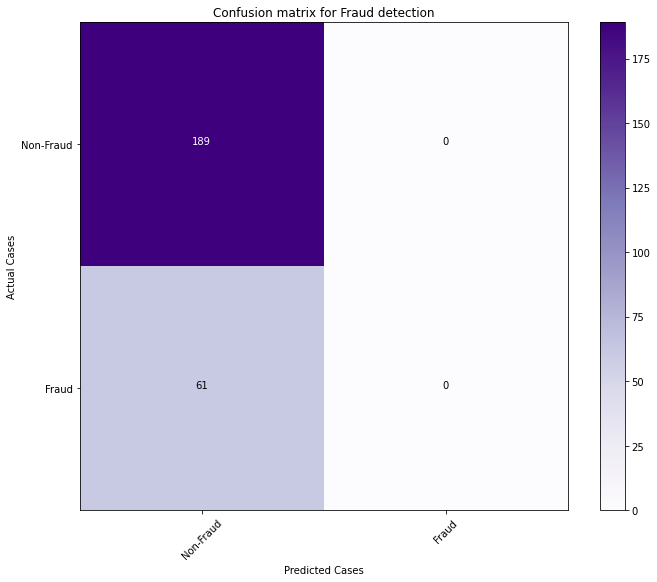

In [58]:
# first using the Support vector classifier for model training
from sklearn.svm import SVC

modeling(SVC(),x_train,y_train,x_test,y_test)

By visualizing the confusion matrix SVC model haven't catogories fraud and non-fraud cases properly. 

In [59]:
from sklearn.svm import SVC
classifier=SVC()

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}

In [50]:
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5,  verbose=3)

In [ ]:
grid.fit(x_train,y_train)

In [53]:
grid.best_estimator_


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



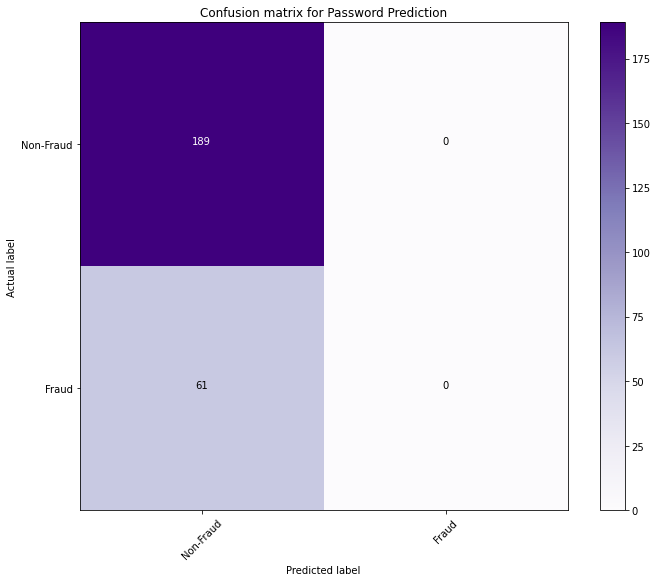

In [54]:
# first using the Support vector classifier for model training
from sklearn.svm import SVC

modeling(grid.best_estimator_,x_train,y_train,x_test,y_test)

### LogisticRegression

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       189
           1       0.25      1.00      0.40        61

    accuracy                           0.27       250
   macro avg       0.62      0.52      0.23       250
weighted avg       0.82      0.27      0.14       250



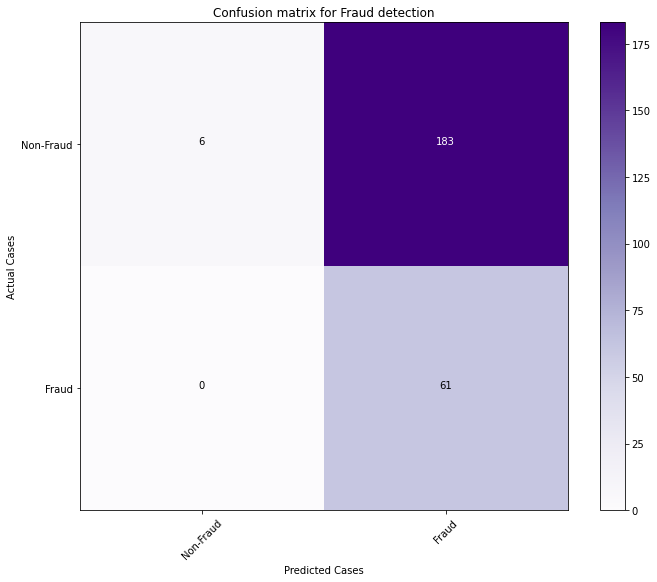

In [60]:
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression(),x_train,y_train,x_test,y_test)

### **XGBoosting Classifier**

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       189
           1       0.38      0.25      0.30        61

    accuracy                           0.72       250
   macro avg       0.58      0.56      0.56       250
weighted avg       0.69      0.72      0.70       250



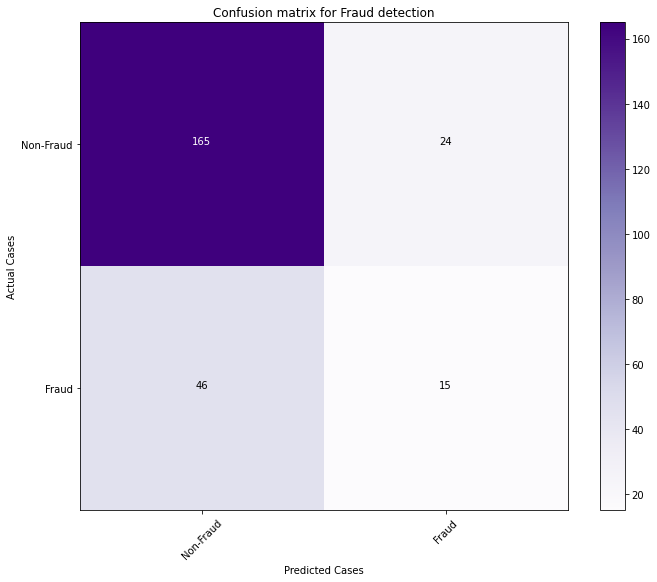

In [62]:
from xgboost import XGBClassifier
modeling(XGBClassifier(random_state = 100),x_train,y_train,x_test,y_test)

Out of Logisticclassifier, SVC and XGBoost classifier, XGBoost Classifier worked better than other algorithms.

In [55]:
xgb=XGBClassifier()
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [56]:
#finding the best parameters
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   34.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
      

In [63]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       189
           1       0.60      0.75      0.67        61

    accuracy                           0.82       250
   macro avg       0.76      0.80      0.77       250
weighted avg       0.84      0.82      0.82       250



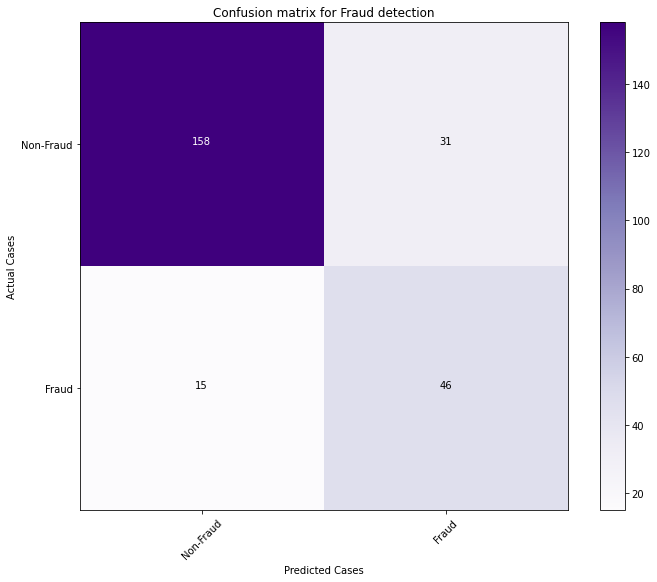

In [64]:
from xgboost import XGBClassifier
modeling(grid.best_estimator_,x_train,y_train,x_test,y_test)

By visualizing the fraud detection- the XGBoost classifier predicts around 15 fraud cases are Non-Fraud cases. This might be a problem So, We will do some more Tuning and find the best parameters to getting good precision and recall.

### **XGBoosting Hyperparameter-Tunning**

#### Grid SearchCV with KFold cross-validation

In [120]:
# Setting the cross validation parameters

from sklearn.model_selection import KFold
tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 100).split(X = x_train,
                                                y = y_train)

In [121]:
# Set parameter tuning

tune_grid = {'learning_rate': [0.2,0.3,0.4,0.5,0.6],
             "criterion": ['gini'],
               'max_depth': range(0, 4, 1),
               'colsample_bytree': [0.5, 1],
               'subsample': [1,2,3],
               'min_child_weight': [1,2],
               'gamma': [0,0.5,1], 
               'n_estimators': range(5, 20, 1),
               'booster': ["gbtree"]} 
classifier = XGBClassifier(objective = "binary:logistic")

In [122]:
# Cross Validation Assembly

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid,
                            scoring = "roc_auc",
                            n_jobs = -1,
                            cv = tune_control,
                            verbose = 5)

In [125]:
# Hyperparameter tuning and cross validation
tune_model = grid_search.fit(X = x_train,y = y_train)

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 2152 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 4168 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 13672 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 17992 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 22888 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 28360 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 34408 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 41032 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 48232 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 54000 out of 54000 | elapsed:  6.9min finished


In [126]:
tune_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=14, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       189
           1       0.60      0.75      0.67        61

    accuracy                           0.82       250
   macro avg       0.76      0.80      0.77       250
weighted avg       0.84      0.82      0.82       250



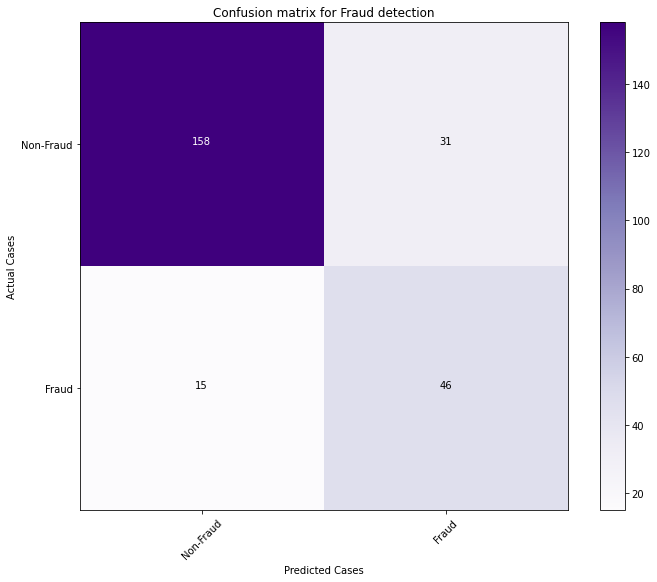

In [127]:
from xgboost import XGBClassifier
modeling(tune_model.best_estimator_,x_train,y_train,x_test,y_test)

### After hyperparameter tuning, we could able to get good precision and recall.